In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv(r"C:\Users\Tejes\Downloads\Wine.csv")

In [24]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
data.shape

(178, 13)

In [26]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [27]:
X=pd.DataFrame(data)
X.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    cluster=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model=cluster.fit(X)
    wcss.append(model.inertia_)
    print(model.inertia_)
   



C:\Users\Tejes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


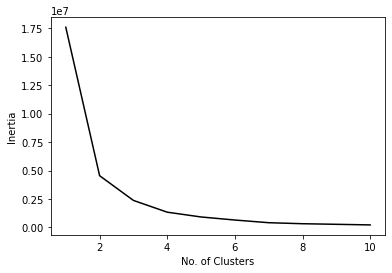

In [51]:

plt.plot(range(1,11),wcss,'-0')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
cluster=KMeans(n_clusters=4,init='k-means++',random_state=42)
model=cluster.fit_predict(X)

In [64]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,cluster.labels_,random_state=42)
print('Silhouette Score is: ',round(score,3))


Silhouette Score is:  0.557


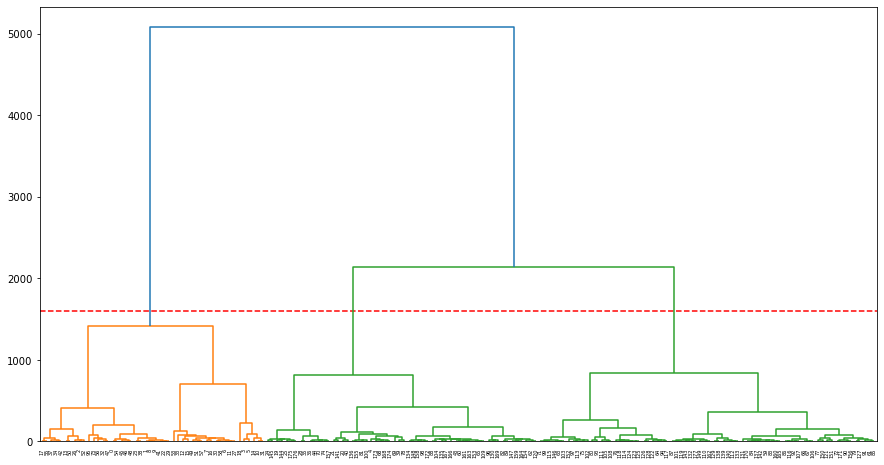

In [65]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(X,method='ward')
plt.figure(figsize=(15,8))
plt.hlines(1600,0,5000,colors='r',linestyles='dashed')
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [66]:
from sklearn.cluster import AgglomerativeClustering
cluster_hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster_hc.fit_predict(X)

In [67]:
hc_score=silhouette_score(X,cluster_hc.labels_,random_state=42)
print('Silhouette Score is: ',round(hc_score,3))


Silhouette Score is:  0.564


Silhouette Score for K-Means Clustering = 0.557

Silhouette score for Agglomerative Culstering = 0.564

Agglomerative clustering is more prefered as its silhouette score is more closer 1 than K-Means clustering